In [5]:
! pip install opencv-python

In [1]:
import cv2
img = cv2.imread("new_row_image.jpeg")
print(img.shape)

(533, 612, 3)


In [2]:
# the second dimension change vertically
img_size_x, img_size_y = 612, 533

beak_tri_1_x, beak_tri_1_y =  447, 230
beak_tri_2_x, beak_tri_2_y = 447, 270
beak_tri_3_x, beak_tri_3_y = 480, 252

#wing rectangle:
left_up_x,left_up_y = 88, 84
right_down_x, right_down_y = 349, 358

In [97]:
from PIL import Image
import numpy as np

def scale_region(img_path, region, scale_factor, direction):
    # Open the original image
    image = Image.open(img_path)
    base_size = 25
    
    if len(region)==2:
        # rectangle case
        box = (region[0][0], region[0][1], region[1][0], region[1][1])
        portion = image.crop(box)
        magnified = portion.resize((int((region[1][0]-region[0][0]) * scale_factor), (int((region[1][1]-region[0][1]) * scale_factor))))
        for_shape = np.array(magnified)
        print((region[1][0] - for_shape.shape[0], region[1][1] - for_shape.shape[0], region[1][0], region[1][1]))
        print(region)
        pixdata = image.load()
        for px in range(region[0][0], region[1][0]-25):
            for py in range(region[0][1], region[1][1]-25):
                if px < -0.9*py + 516.17:
                    pixdata[px, py] = (255,255,255)
        image.paste(magnified, (region[1][0] - for_shape.shape[0]-10, region[1][1] - for_shape.shape[0]-25))
        
    elif len(region)==3:
        # triangle case
        # the points are in the anti-clock order
        # the direction can be [1,0]
                
        # integrate Sam's code
        
        # Get a box of the portion you want to magnify
        box = (region[0][0], region[0][1], region[2][0], region[1][1] + base_size * scale_factor)
        portion = image.crop(box)

        # Resize the portion to double the size
        magnified = portion.resize((60 + int(base_size * scale_factor), 50 + int(base_size * scale_factor))) # magic number???

        # Paste the magnified portion back on to the original image
        image.paste(magnified, (447, 230)) # the second parameter is the upper left corner              
        
    return image
                
                

In [98]:
import random
import matplotlib as mpl
import matplotlib.cm as cm

def color(image, x):

    norm = mpl.colors.Normalize(vmin=0, vmax=1)
    cmap = cm.hot
    m = cm.ScalarMappable(norm=norm, cmap=cmap)
    y = m.to_rgba(x)

    img = Image.open(image)
    img = img.convert("RGB")

    d = img.getdata()

    new_image = []
    for item in d:

        # change all white (also shades of whites)
        # pixels to yellow
        if item[0] not in list(range(200, 256)) and item[0] not in list(range(0,80)):
            new_image.append(tuple([np.uint8(i*255) for i in y]))
        else:
            new_image.append(item)

    # update image data
    img.putdata(new_image)

    # save new image
    return img

(-62, -53, 349, 358)
[[88, 84], [349, 358]]


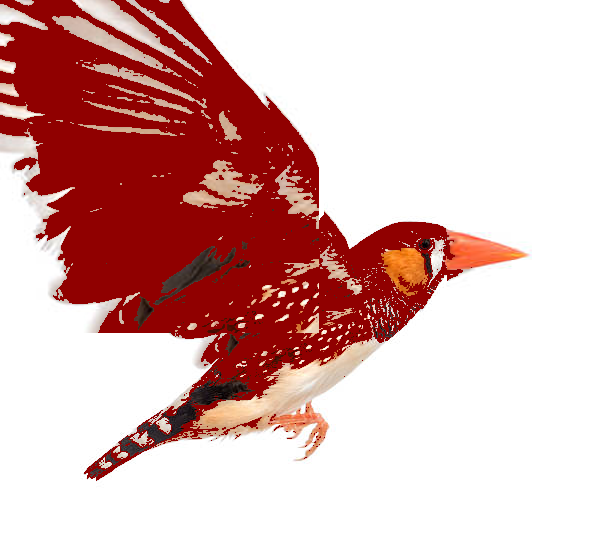

In [99]:
new_img = scale_region("new_row_image.jpeg", [[beak_tri_1_x, beak_tri_1_y],[beak_tri_2_x, beak_tri_2_y],[beak_tri_3_x, beak_tri_3_y]], 1, [1,0])
new_img.save("gen_image_tri.png")
new_img = scale_region("gen_image_tri.png", [[left_up_x,left_up_y],[right_down_x, right_down_y]], 1.5, [1,0])
new_img.save("gen_image_rect.png")

new_img = color("gen_image_rect.png", 0.2)
new_img.save("gen_image_color.png")

from IPython.display import Image
Image(filename="gen_image_color.png")
